# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzašším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **survived**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [123]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

## Příprava dat před použitím modelu

In [124]:
titanic = pd.read_csv('data.csv')
display(titanic.head())
display(titanic.info())

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


None

## Odstranění sloupců 
Tyto sloupce neobsahují žádnou užitečnou informaci pro trénink modelu. Například sloupec 'ID' mohou být pouze jedinečnými identifikátory záznamů a nepřispívají k predikci cílové proměnné, dokonce ID člověka na každém řádku je shodné s indexaci v DataFrame. 

In [125]:
titanic = titanic.drop(columns=['home.dest','name', 'ID'])
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,11.0,5,2,CA 2144,46.9000,NaN,S
1,0,3,male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
2,0,3,male,4.0,3,2,347088,27.9000,NaN,S
3,1,3,female,NaN,1,0,370365,15.5000,NaN,Q
4,1,3,female,18.0,0,0,2657,7.2292,NaN,C


Některé příznaky jsou nevyplněné, při procházení data.csv jsem nenarazil na jinou nevyplněnou hodnotu než NaN

In [126]:
titanic = titanic.replace(np.nan, -1)
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,11.0,5,2,CA 2144,46.9000,-1,S
1,0,3,male,-1.0,0,0,SOTON/O.Q. 3101305,7.0500,-1,S
2,0,3,male,4.0,3,2,347088,27.9000,-1,S
3,1,3,female,-1.0,1,0,370365,15.5000,-1,Q
4,1,3,female,18.0,0,0,2657,7.2292,-1,C


### Převod textových dat na číselná data


In [127]:
string_cols = titanic.select_dtypes(['object']).columns
display(string_cols)
titanic[string_cols] = titanic[string_cols].astype('category').apply(lambda x: x.cat.codes)
titanic.info()

Index(['sex', 'ticket', 'cabin', 'embarked'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int8   
 3   age       1000 non-null   float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   ticket    1000 non-null   int16  
 7   fare      1000 non-null   float64
 8   cabin     1000 non-null   int16  
 9   embarked  1000 non-null   int8   
dtypes: float64(2), int16(2), int64(4), int8(2)
memory usage: 52.9 KB


## Příprava trénovací a validační množiny pro učení stromu
Nejdříve rozdělíme DataFrame na příznaky a vysvětlovanou proměnnou

In [128]:
Xdata = titanic.iloc[:,1:]
Ydata = titanic.iloc[:,0]
display(Xdata)
display(Ydata)

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,1,11.0,5,2,617,46.9000,0,3
1,3,1,-1.0,0,0,698,7.0500,0,3
2,3,1,4.0,3,2,378,27.9000,0,3
3,3,0,-1.0,1,0,506,15.5000,0,2
4,3,0,18.0,0,0,207,7.2292,0,1
...,...,...,...,...,...,...,...,...,...
995,2,1,52.0,0,0,181,13.0000,0,3
996,2,1,29.0,0,0,740,10.5000,0,3
997,1,1,56.0,0,0,47,26.5500,0,3
998,1,1,25.0,1,0,60,55.4417,138,1


0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: survived, Length: 1000, dtype: int64

Rozdělíme data podle poměru tak, že 25 % dat vezmeme jako testovací množinu a ze zbytku vezmeme 25% jako validační množinu. Co zbude, jsou trénovací data

In [129]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

random_seed = 666
# Training data for tree
XtrainTree, XtestTree, YtrainTree, YtestTree = train_test_split(Xdata, Ydata, test_size=0.25, random_state=random_seed)
XtrainTree, XvalTree, YtrainTree, YvalTree = train_test_split(XtrainTree, YtrainTree, test_size=0.25, random_state=random_seed)
# Training data for KNN
XtrainKNN, XtestKNN, YtrainKNN, YtestKNN = train_test_split(Xdata, Ydata, test_size=0.25, random_state=random_seed)
XtrainKNN, XvalKNN, YtrainKNN, YvalKNN = train_test_split(XtrainKNN, YtrainKNN, test_size=0.25, random_state=random_seed)


param_grid_tree = {
    'max_depth': range(1,30),
    'criterion': ['entropy', 'gini'],
    'max_features': [None,'sqrt','log2'],
}
# Get params combinations
param_comb_tree = ParameterGrid(param_grid_tree)

k_neighbors = range(1,30)


val_acc_tree = []
train_acc_tree = []

val_acc_knn = []
train_acc_knn = []


best tree params  {'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}


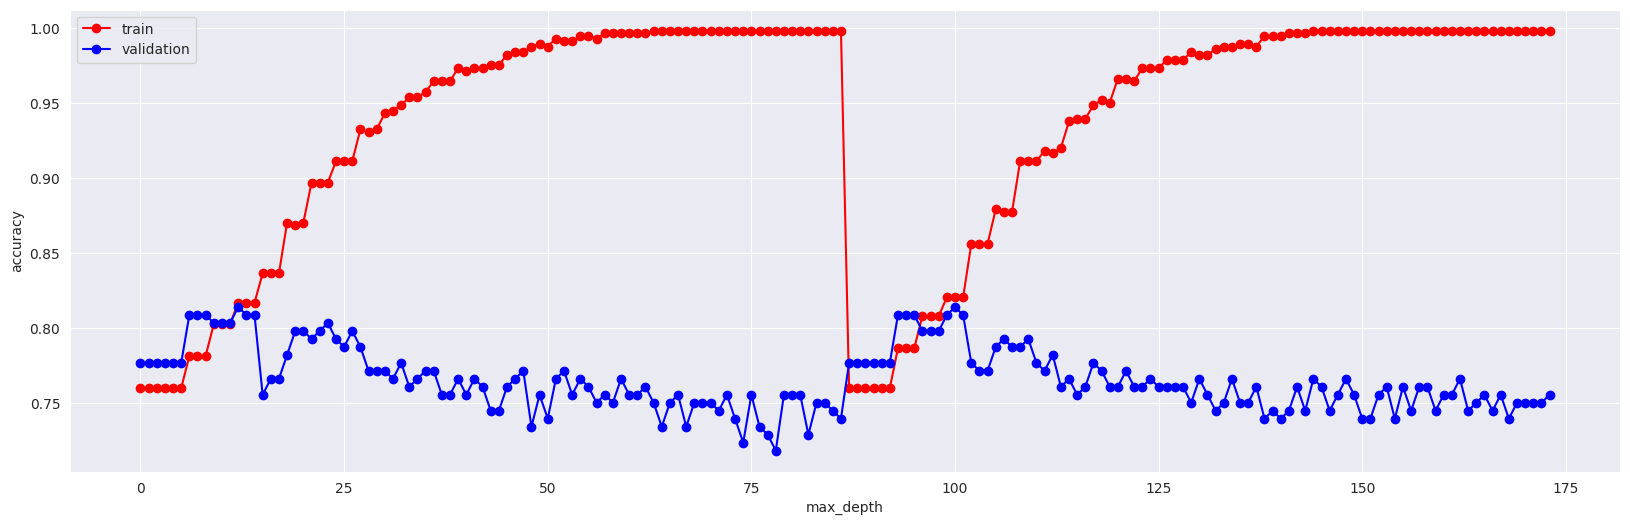

"\nfor k in k_neighbors:\n    clf = KNeighborsClassifier(n_neighbors=k)\n    clf.fit(XtrainKNN, YtrainKNN)\n    val_acc_knn.append(clf.score(XvalKNN, YvalKNN))\n    train_acc_knn.append(clf.score(XtrainKNN, YtrainKNN))\n\nbest_params_knn = k_neighbors[np.argmax(val_acc_knn)]\nprint('best knn params:', best_params_knn)\nplt.figure(figsize=(20, 6))\nplt.plot(k_neighbors, train_acc_knn, 'or-')  #o: body, r: barva, -: spojení bodů linkou\nplt.plot(k_neighbors, val_acc_knn, 'ob-')\nplt.xlabel('max_depth')\nplt.ylabel('accuracy')\nplt.legend(['train', 'validation'])\n"

In [130]:
# Count all accuracies for each param combination
for params in param_comb_tree:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(XtrainTree, YtrainTree)
    train_acc_tree.append(metrics.accuracy_score(YtrainTree, dt.predict(XtrainTree)))
    val_acc_tree.append(metrics.accuracy_score(YvalTree, dt.predict(XvalTree)))

plt.figure(figsize=(20,6))
plt.plot(train_acc_tree,'or-')
plt.plot(val_acc_tree,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
best_params_tree = param_comb_tree[np.argmax(val_acc_tree)]
print('best tree params ', best_params_tree)

plt.show()
"""
for k in k_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XtrainKNN, YtrainKNN)
    val_acc_knn.append(clf.score(XvalKNN, YvalKNN))
    train_acc_knn.append(clf.score(XtrainKNN, YtrainKNN))

best_params_knn = k_neighbors[np.argmax(val_acc_knn)]
print('best knn params:', best_params_knn)
plt.figure(figsize=(20, 6))
plt.plot(k_neighbors, train_acc_knn, 'or-')  #o: body, r: barva, -: spojení bodů linkou
plt.plot(k_neighbors, val_acc_knn, 'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
"""

accuracy score tree (train): 0.816726
accuracy score tree (validation): 0.813830
accuracy score tree(test): 0.768000
F1 score (validation): 0.758621
AUC Tree(validation): 0.798584


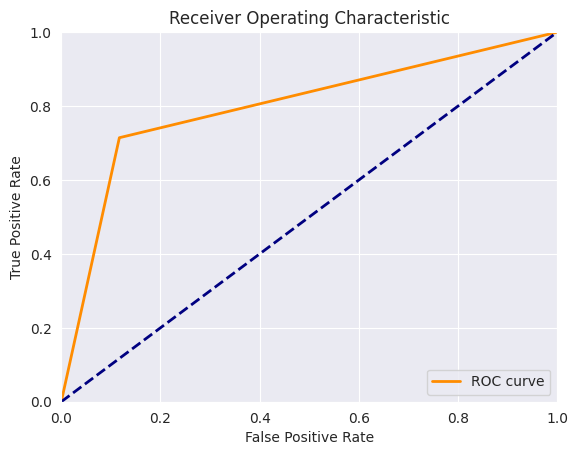

"\nbest_knn = KNeighborsClassifier(n_neighbors=best_params_knn)\nbest_knn.fit(XtrainKNN, YtrainKNN)\nprint('accuracy score KNN (train): {0:.6f}'.format(metrics.accuracy_score(YtrainKNN, best_knn.predict(XtrainKNN))))\nprint('accuracy score KNN (validation): {0:.6f}'.format(metrics.accuracy_score(YvalKNN, best_knn.predict(XvalKNN))))\nprint('accuracy score KNN (test): {0:.6f}'.format(metrics.accuracy_score(YtestKNN, best_knn.predict(XtestKNN))))\n\nf1_score_val_knn = metrics.f1_score(YvalKNN, best_tree.predict(XvalKNN))\nprint('F1 score KNN (validation): {0:.6f}'.format(f1_score_val_knn))\n\nfpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(YvalKNN, best_tree.predict(XvalKNN))\nroc_auc_knn = metrics.auc(fpr_knn, tpr_knn)\nprint('AUC KNN(validation): {0:.6f}'.format(roc_auc_knn))\n\nplt.figure()\nplt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve')\nplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.0])\nplt.xlabel('

In [131]:
best_tree = DecisionTreeClassifier(max_depth=best_params_tree['max_depth'], criterion=best_params_tree['criterion'])
best_tree.fit(XtrainTree, YtrainTree)
print('accuracy score tree (train): {0:.6f}'.format(metrics.accuracy_score(YtrainTree, best_tree.predict(XtrainTree))))
print('accuracy score tree (validation): {0:.6f}'.format(metrics.accuracy_score(YvalTree, best_tree.predict(XvalTree))))
print('accuracy score tree(test): {0:.6f}'.format(metrics.accuracy_score(YtestTree, best_tree.predict(XtestTree))))

f1_score_val = metrics.f1_score(YvalTree, best_tree.predict(XvalTree))
print('F1 score (validation): {0:.6f}'.format(f1_score_val))

fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(YvalTree, best_tree.predict(XvalTree))
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)
print('AUC Tree(validation): {0:.6f}'.format(roc_auc_tree))

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

"""
best_knn = KNeighborsClassifier(n_neighbors=best_params_knn)
best_knn.fit(XtrainKNN, YtrainKNN)
print('accuracy score KNN (train): {0:.6f}'.format(metrics.accuracy_score(YtrainKNN, best_knn.predict(XtrainKNN))))
print('accuracy score KNN (validation): {0:.6f}'.format(metrics.accuracy_score(YvalKNN, best_knn.predict(XvalKNN))))
print('accuracy score KNN (test): {0:.6f}'.format(metrics.accuracy_score(YtestKNN, best_knn.predict(XtestKNN))))

f1_score_val_knn = metrics.f1_score(YvalKNN, best_tree.predict(XvalKNN))
print('F1 score KNN (validation): {0:.6f}'.format(f1_score_val_knn))

fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(YvalKNN, best_tree.predict(XvalKNN))
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
print('AUC KNN(validation): {0:.6f}'.format(roc_auc_knn))

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc='lower right')
plt.show()
"""

best knn params: 12


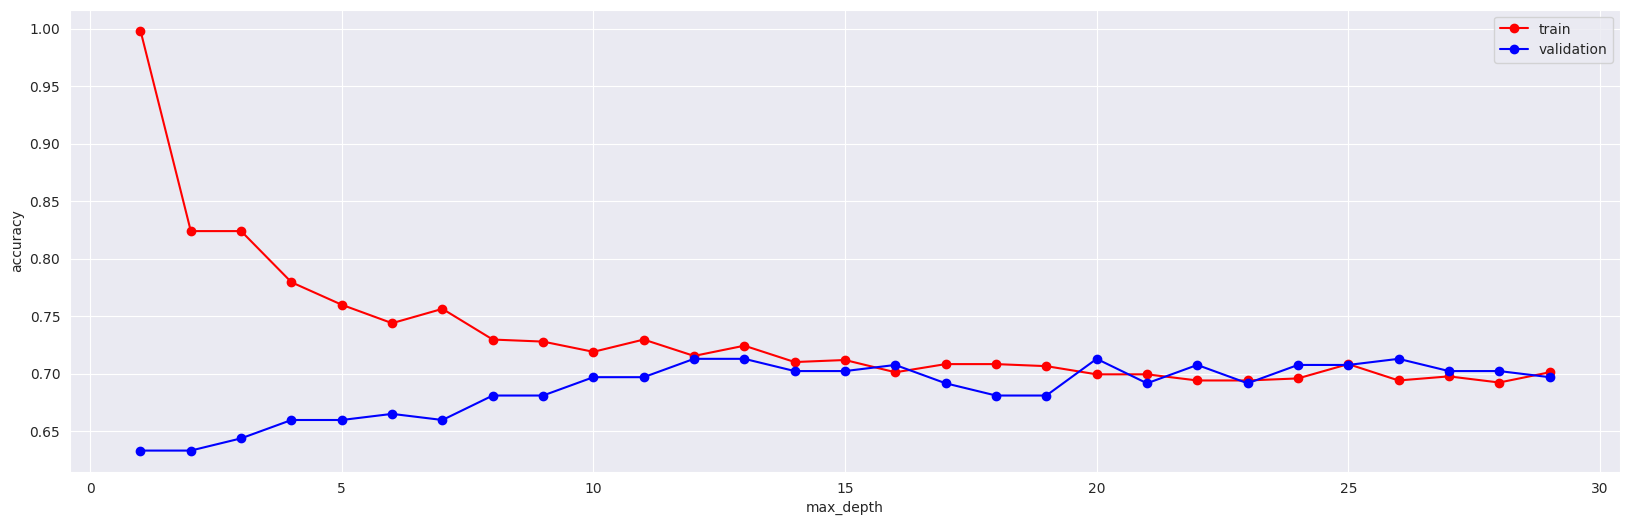

In [132]:

for k in k_neighbors:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(XtrainKNN, YtrainKNN)
    val_acc_knn.append(clf.score(XvalKNN, YvalKNN))
    train_acc_knn.append(clf.score(XtrainKNN, YtrainKNN))

best_params_knn = k_neighbors[np.argmax(val_acc_knn)]
print('best knn params:', best_params_knn)
plt.figure(figsize=(20,6))
plt.plot(k_neighbors, train_acc_knn,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(k_neighbors, val_acc_knn,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])    
   

accuracy score KNN (train): 0.715302
accuracy score KNN (validation): 0.712766
accuracy score KNN (test): 0.664000
F1 score KNN (validation): 0.758621
AUC KNN(validation): 0.798584


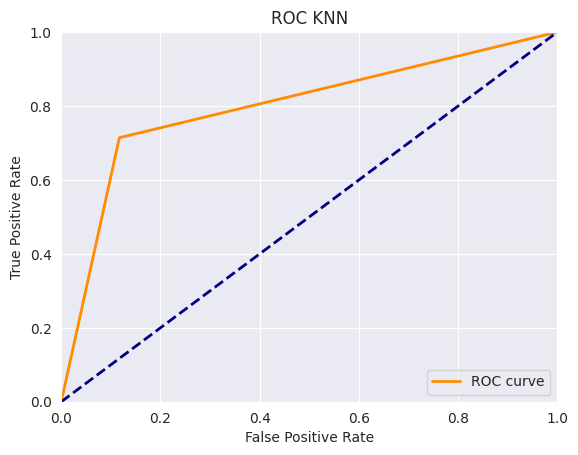

In [133]:

best_knn = KNeighborsClassifier(n_neighbors=best_params_knn)
best_knn.fit(XtrainKNN, YtrainKNN)
print('accuracy score KNN (train): {0:.6f}'.format(metrics.accuracy_score(YtrainKNN, best_knn.predict(XtrainKNN))))
print('accuracy score KNN (validation): {0:.6f}'.format(metrics.accuracy_score(YvalKNN, best_knn.predict(XvalKNN))))
print('accuracy score KNN (test): {0:.6f}'.format(metrics.accuracy_score(YtestKNN, best_knn.predict(XtestKNN))))

f1_score_val_knn = metrics.f1_score(YvalKNN, best_tree.predict(XvalKNN))
print('F1 score KNN (validation): {0:.6f}'.format(f1_score_val_knn))

fpr, tpr, thresholds = metrics.roc_curve(YvalKNN, best_tree.predict(XvalKNN))
roc_auc = metrics.auc(fpr, tpr)
print('AUC KNN(validation): {0:.6f}'.format(roc_auc))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc='lower right')
plt.show()
